In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%cd /content/drive/MyDrive/TimeSeries
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

df=pd.read_csv("dataset/AMZN.csv")

print('Number of rows and columns:', df.shape)

df.head(5)

/content/drive/MyDrive/TimeSeries
Number of rows and columns: (1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-10,49.833500,49.897499,49.005001,49.360001,49.360001,61698000
1,2017-10-11,49.563499,49.775002,49.334999,49.750000,49.750000,46742000
2,2017-10-12,49.840500,50.422001,49.619999,50.046501,50.046501,81346000
3,2017-10-13,50.349998,50.388500,50.051498,50.146999,50.146999,48630000
4,2017-10-16,50.422001,50.478500,50.051998,50.317001,50.317001,40178000


In [29]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [30]:
# Feature Scaling 데이터 정규화

sc = MinMaxScaler(feature_range = (0, 1))

training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output

X_train = []

y_train = []

for i in range(60, 800):

   X_train.append(training_set_scaled[i-60:i, 0])

   y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#(740, 60, 1)
X_train.shape

(740, 60, 1)

In [31]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [32]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 19ms/step - loss: 0.0411
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0083
Epoch 3/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0046
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 5/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0050
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0048
Epoch 7/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 8/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0044
Epoch 9/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0052
Epoch 10/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0046
Epoch 11/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0040
Epoch 12/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0037
Epoch 13/100
24/24 [=====

In [34]:
# Getting the predicted stock price of 2017

dataset_train = df.iloc[:800, 1:2]

dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 518):

   X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(458, 60, 1)


15/15 [==============================] - 0s 9ms/step


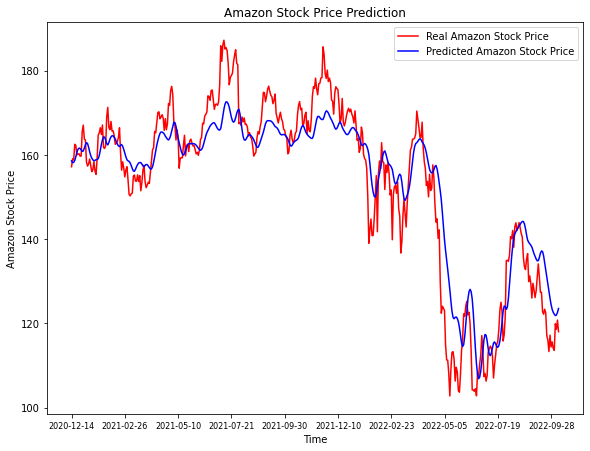

In [36]:
#테스트 세트를 사용하여 예측하기

predicted_stock_price = model.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#결과 시각화

# Visualising the results
plt.figure(figsize=(9.6,7.2))

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real Amazon Stock Price')

plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.xticks(np.arange(0,458,50), fontsize= 8)
plt.title('Amazon Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Amazon Stock Price')


plt.legend()

plt.show()